### Install detectron2

In [1]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random,pickle

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.data import datasets
from detectron2 import model_zoo

In [2]:
def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(), plt.imshow(im), plt.axis('off');

In [3]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from matplotlib.pyplot import imshow
from PIL import Image
import IPython
def cv2_imshow(img):
    img = img[:,:,[2,1,0]]
    img = Image.fromarray(img)
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Train on a custom COCO dataset

### Train Data

In [4]:
train_dataset_name = 'frcnn'
train_image_path = "/Users/Rekha/Documents/road_signs/images/train"
train_json_annot_path = "/Users/Rekha/Documents/road_signs/labels/train/coco.json"
f = open(train_json_annot_path, 'r')
train_annotations = json.load(f)
f.close()
num_classes = len(train_annotations['categories'])


### Validation Data

In [5]:
test_dataset_name = 'frcnn_test'
test_image_path = '/Users/Rekha/Documents/road_signs/images/valid'
test_json_annot_path = "/Users/Rekha/Documents/road_signs/labels/valid/coco.json"
f = open(train_json_annot_path, 'r')
train_annotations = json.load(f)
f.close()
num_classes = len(train_annotations['categories'])

In [6]:
cfg_save_path =  '/Users/Rekha/Documents/road_signs/detectron2/IS_cfg.pickle'
training_dict = datasets.load_coco_json(train_json_annot_path, train_image_path,
                dataset_name=train_dataset_name)

[12/15 14:05:00 d2.data.datasets.coco]: Loaded 1484 images in COCO format from /Users/Rekha/Documents/road_signs/labels/train/coco.json


In [ ]:
### Register the dataset

In [8]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances(train_dataset_name, {}, train_json_annot_path, train_image_path)
register_coco_instances(test_dataset_name, {}, test_json_annot_path, test_image_path)

In [11]:
frcnn_metadata = MetadataCatalog.get("frcnn")
dataset_dicts = DatasetCatalog.get("frcnn")

[12/15 14:09:26 d2.data.datasets.coco]: Loaded 1484 images in COCO format from /Users/Rekha/Documents/road_signs/labels/train/coco.json


### To verify the data loading is correct, let's visualize the annotations of randomly selected samples in the training set

In [ ]:
#import random

#for d in random.sample(dataset_dicts,10):
    #img = cv2.imread(d["file_name"])
    #visualizer = Visualizer(img[:, :, ::-1], metadata=frcnn_metadata, scale=0.5)
    #vis = visualizer.draw_dataset_dict(d)
    #cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
### Now, let's fine-tune a coco-pretrained R50-FPN Faster R-CNN model on the traffic_sign dataset. It takes 4hrs to   train 40000 iterations on Jupyternotebook with 8GPU.


In [12]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("frcnn",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 0
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl"  
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  
cfg.SOLVER.MAX_ITER = 40000
cfg.SOLVER.STEPS = [30000]
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 15 

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[12/15 14:09:48 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (60, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (60,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias

[12/15 14:09:48 d2.engine.train_loop]: Starting training from iteration 0


C:\Users\Rekha\anaconda3\envs\detect\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/15 14:09:58 d2.utils.events]:  eta: 3:25:03  iter: 19  total_loss: 2.982  loss_cls: 2.75  loss_box_reg: 0.07033  loss_rpn_cls: 0.08711  loss_rpn_loc: 0.07969  time: 0.3093  data_time: 0.1130  lr: 4.9953e-06  max_mem: 1627M
[12/15 14:10:05 d2.utils.events]:  eta: 3:25:44  iter: 39  total_loss: 2.828  loss_cls: 2.568  loss_box_reg: 0.06489  loss_rpn_cls: 0.05661  loss_rpn_loc: 0.05838  time: 0.3102  data_time: 0.1137  lr: 9.9902e-06  max_mem: 1627M
[12/15 14:10:11 d2.utils.events]:  eta: 3:26:44  iter: 59  total_loss: 2.416  loss_cls: 2.15  loss_box_reg: 0.06387  loss_rpn_cls: 0.1203  loss_rpn_loc: 0.05932  time: 0.3128  data_time: 0.1166  lr: 1.4985e-05  max_mem: 1627M
[12/15 14:10:17 d2.utils.events]:  eta: 3:25:52  iter: 79  total_loss: 1.79  loss_cls: 1.512  loss_box_reg: 0.05477  loss_rpn_cls: 0.0487  loss_rpn_loc: 0.07369  time: 0.3128  data_time: 0.1157  lr: 1.998e-05  max_mem: 1627M
[12/15 14:10:24 d2.utils.events]:  eta: 3:25:46  iter: 99  total_loss: 0.9406  loss_cls: 0.746

### Tensor Board

In [13]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

In [14]:
frcnn_test_metadata = MetadataCatalog.get("frcnn_test")
dataset_dicts = DatasetCatalog.get("frcnn_test")

[12/16 09:32:02 d2.data.datasets.coco]: Loaded 384 images in COCO format from /Users/Rekha/Documents/road_signs/labels/valid/coco.json


####  inference with the trained model on the img dataset. First, let's create a predictor using the model we just trained

In [15]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("frcnn_test", )
predictor = DefaultPredictor(cfg)

#### Then, we randomly select several samples to visualize the prediction results.

In [2]:
#from detectron2.utils.visualizer import ColorMode
#dataset_dicts = DatasetCatalog.get("frcnn_test")
#for d in random.sample(dataset_dicts, 20):    
    #im = cv2.imread(d["file_name"])
   # outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    #v = Visualizer(im[:, :, ::-1],
                   #metadata=frcnn_test_metadata, 
                   #scale=0.5, 
                   #instance_mode=ColorMode.IMAGE  # remove the colors of unsegmented pixels. This option is only available for segmentation models
  #  )
    #out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
   # cv2_imshow(out.get_image()[:, :, ::-1])

### Evaluate its performance using AP metric implemented in COCO API(test set)

In [21]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("frcnn_test", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "frcnn_test")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

[12/16 09:40:28 d2.data.datasets.coco]: Loaded 384 images in COCO format from /Users/Rekha/Documents/road_signs/labels/valid/coco.json
[12/16 09:40:28 d2.data.build]: Distribution of instances among all 15 categories:
|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
|  red_square   | 2            |  blue_square  | 12           | white_square  | 25           |
| right_of_way  | 15           |   direction   | 68           |  blue_circle  | 31           |
| yellow_blac.. | 18           |     yield     | 31           |  zone_start   | 4            |
|  red_circle   | 57           | red_blue_ci.. | 4            | yield_bakside | 14           |
| blue_white_.. | 22           |   zone_end    | 8            | red_triangle  | 3            |
|               |              |               |              |               |              |
|     total     | 314 

In [22]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("frcnn", )
predictor = DefaultPredictor(cfg)

#### Performance using AP metric using Train set

In [23]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("frcnn", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "frcnn")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

[12/16 09:41:54 d2.data.datasets.coco]: Loaded 1484 images in COCO format from /Users/Rekha/Documents/road_signs/labels/train/coco.json
[12/16 09:41:54 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[12/16 09:41:54 d2.data.common]: Serializing 1484 elements to byte tensors and concatenating them all ...
[12/16 09:41:54 d2.data.common]: Serialized dataset takes 0.41 MiB
[12/16 09:41:54 d2.evaluation.evaluator]: Start inference on 1484 batches
[12/16 09:41:56 d2.evaluation.evaluator]: Inference done 11/1484. Dataloading: 0.0540 s/iter. Inference: 0.0491 s/iter. Eval: 0.0001 s/iter. Total: 0.1033 s/iter. ETA=0:02:32
[12/16 09:42:01 d2.evaluation.evaluator]: Inference done 56/1484. Dataloading: 0.0630 s/iter. Inference: 0.0483 s/iter. Eval: 0.0002 s/iter. Total: 0.1115 s/iter. ETA=0:02:39
[12/16 09:42:06 d2.evaluation.evaluator]: Inference done 100/1484. Dataloading: 0.0643 s

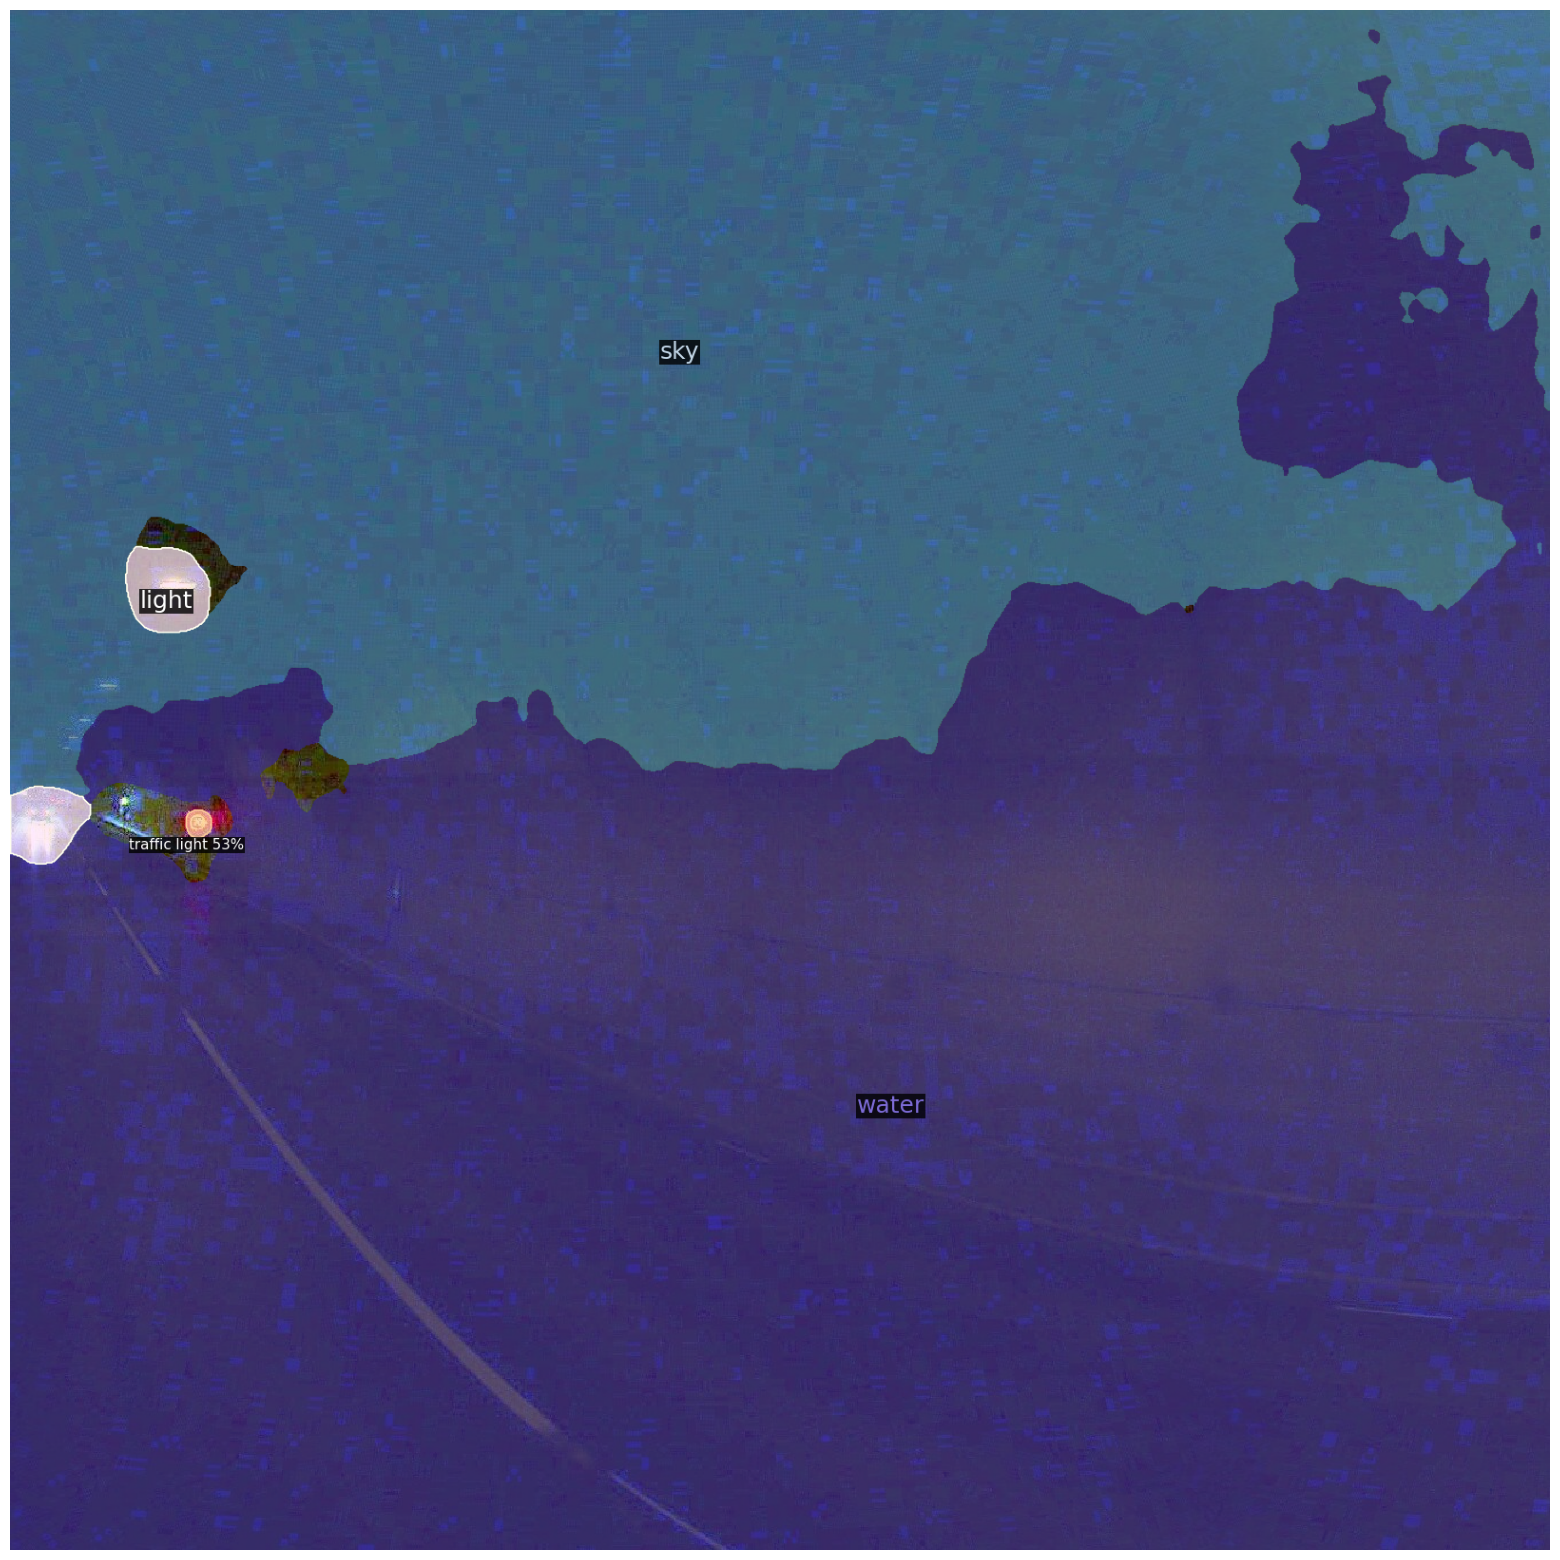

In [43]:
# Inference with a panoptic segmentation model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])